In [1]:
# Import the time library and the datetime module from the datetime library
import pandas as pd
import time
from datetime import datetime
import requests
from config import weather_api_key
import matplotlib.pyplot as plt

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a288c9e5629ba33b3960826b7d39dd61


In [39]:
cities = ['Tuktoyaktuk', 'Hemanus', 'Bluff', 'Port Alfred', 'Outjo', 'Agadez', 'Paso De Los Toros', 'Avarua', 'Taltal', 'Airai', 'Boston', 'New York', 'Pristine']

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [5]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

# Create endpoint URL with each city.
city_url = url + "&q=" + cities[i]

In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete      ")
print("----------------------------")

Processing Record 1 of Set 1 | Tuktoyaktuk
Processing Record 2 of Set 1 | Hemanus
City not found. Skipping...
Processing Record 3 of Set 1 | Bluff
Processing Record 4 of Set 1 | Port Alfred
Processing Record 5 of Set 1 | Outjo
Processing Record 6 of Set 1 | Agadez
Processing Record 7 of Set 1 | Paso De Los Toros
Processing Record 8 of Set 1 | Avarua
Processing Record 9 of Set 1 | Taltal
Processing Record 10 of Set 1 | Airai
Processing Record 11 of Set 1 | Boston
Processing Record 12 of Set 1 | New York
Processing Record 13 of Set 1 | Pristine
City not found. Skipping...
----------------------------
Data Retrieval Complete      
----------------------------


In [7]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-22.00,83,40,10.36,CA,2023-02-27 14:16:18
1,Bluff,-46.6000,168.3333,54.61,88,89,5.08,NZ,2023-02-27 14:15:32
2,Port Alfred,-33.5906,26.8910,77.18,79,6,3.00,ZA,2023-02-27 14:16:18
3,Outjo,-20.1167,16.1500,79.54,42,96,10.67,NA,2023-02-27 14:16:18
4,Agadez,19.7500,10.2500,91.89,8,67,2.44,NE,2023-02-27 14:16:18
5,Paso De Los Toros,-32.8167,-56.5167,82.18,40,0,9.80,UY,2023-02-27 14:16:19
6,Avarua,-21.2078,-159.7750,77.05,88,100,2.30,CK,2023-02-27 14:16:19
7,Taltal,-25.4000,-70.4833,72.36,68,0,5.35,CL,2023-02-27 14:16:19
8,Airai,-8.9266,125.4092,61.36,94,100,3.74,TL,2023-02-27 14:16:19
9,Boston,42.3584,-71.0598,32.95,62,20,14.97,US,2023-02-27 14:13:31


In [8]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2023-02-27 14:16:18,69.4541,-133.0374,-22.00,83,40,10.36
1,Bluff,NZ,2023-02-27 14:15:32,-46.6000,168.3333,54.61,88,89,5.08
2,Port Alfred,ZA,2023-02-27 14:16:18,-33.5906,26.8910,77.18,79,6,3.00
3,Outjo,NA,2023-02-27 14:16:18,-20.1167,16.1500,79.54,42,96,10.67
4,Agadez,NE,2023-02-27 14:16:18,19.7500,10.2500,91.89,8,67,2.44
5,Paso De Los Toros,UY,2023-02-27 14:16:19,-32.8167,-56.5167,82.18,40,0,9.80
6,Avarua,CK,2023-02-27 14:16:19,-21.2078,-159.7750,77.05,88,100,2.30
7,Taltal,CL,2023-02-27 14:16:19,-25.4000,-70.4833,72.36,68,0,5.35
8,Airai,TL,2023-02-27 14:16:19,-8.9266,125.4092,61.36,94,100,3.74
9,Boston,US,2023-02-27 14:13:31,42.3584,-71.0598,32.95,62,20,14.97


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'02/27/23'

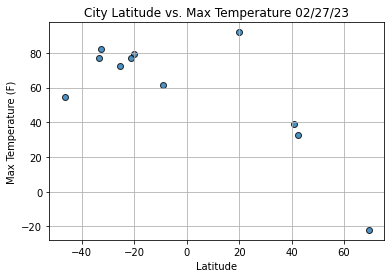

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

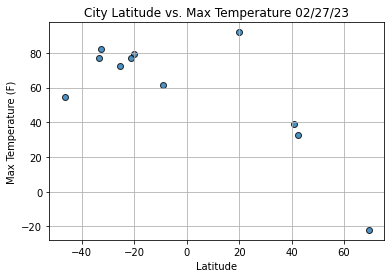

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

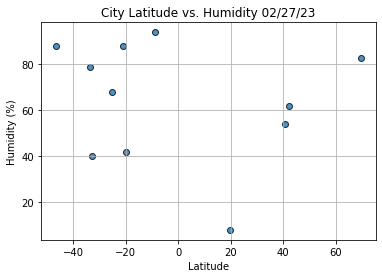

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

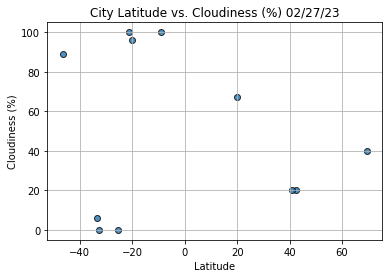

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")


# Show plot.
plt.show()

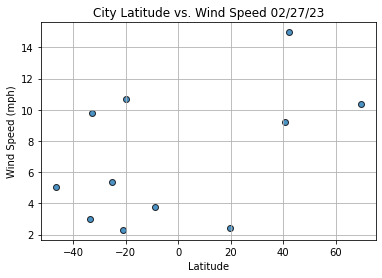

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")

    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Bluff,NZ,2023-02-27 14:15:32,-46.6000,168.3333,54.61,88,89,5.08
2,Port Alfred,ZA,2023-02-27 14:16:18,-33.5906,26.8910,77.18,79,6,3.00
3,Outjo,NA,2023-02-27 14:16:18,-20.1167,16.1500,79.54,42,96,10.67
5,Paso De Los Toros,UY,2023-02-27 14:16:19,-32.8167,-56.5167,82.18,40,0,9.80
6,Avarua,CK,2023-02-27 14:16:19,-21.2078,-159.7750,77.05,88,100,2.30
7,Taltal,CL,2023-02-27 14:16:19,-25.4000,-70.4833,72.36,68,0,5.35
8,Airai,TL,2023-02-27 14:16:19,-8.9266,125.4092,61.36,94,100,3.74


In [21]:
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2023-02-27 14:16:18,69.4541,-133.0374,-22.00,83,40,10.36
4,Agadez,NE,2023-02-27 14:16:18,19.7500,10.2500,91.89,8,67,2.44
9,Boston,US,2023-02-27 14:13:31,42.3584,-71.0598,32.95,62,20,14.97
10,New York,US,2023-02-27 14:12:13,40.7143,-74.0060,39.22,54,20,9.22


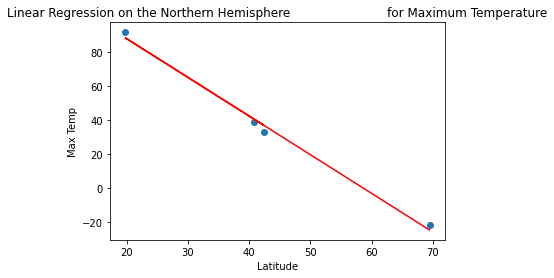

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

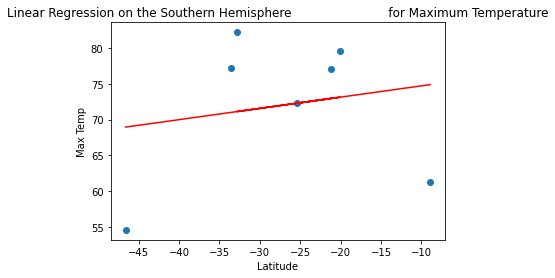

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

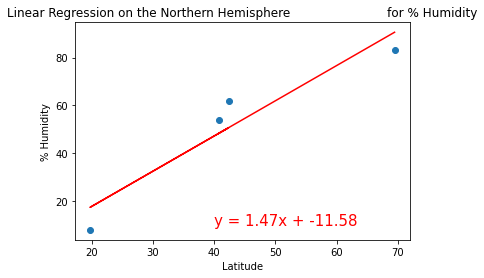

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

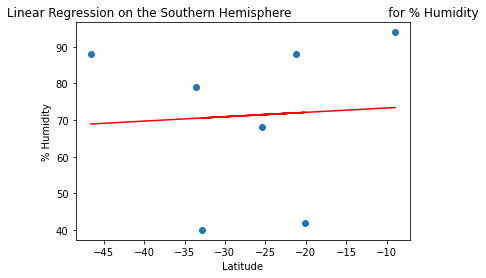

In [25]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

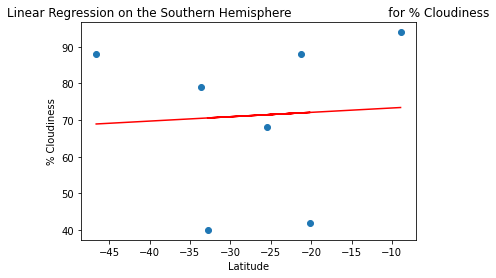

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,65))

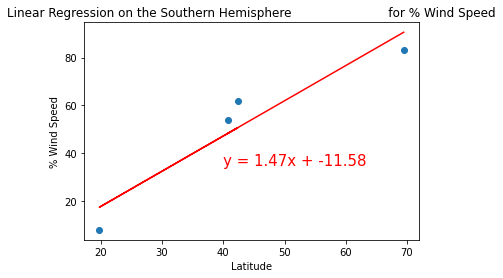

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(40,35))

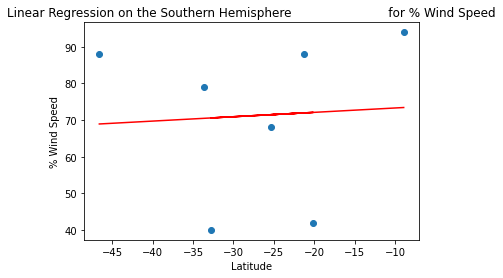

In [28]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(-50,35))